# MA934 Numerical Methods - Workbook 3

If you haven't already done so, install the DualNumbers Julia package. It is a good idea to update all your packages first. The commands are

>Pkg.update()

>Pkg.add("DualNumbers")

but you only need to run them once. 

In [2]:
#Pkg.update()
#Pkg.add("DualNumbers")
using PyPlot
using DualNumbers

## Question 1: Numerical differentiation

**1))** Derive a finite difference formula for the derivative of a function, $f$ at a point $x$ using the 3-point stencil $(x, x+h, x+2h)$ and state the order of the approximation error in terms of $h$.

**2)** Write a formula for the derivative, $f^\prime(x)$, of the function

$$f(x) = \sin(\exp(x)) $$

and evaluate it at $x=1$.

**3)** Use your finite difference formula to approximate the value of $f^\prime(1)$ for values of $h$ decreasing from $2^{-1}$ to $2^{-30}$ in powers of $2$. Plot the error as a function of $h$ and verify the theoretically predicted scaling of the error with $h$. What is the best relative error you can achieve?

**4)** Read the examples at https://github.com/JuliaDiff/DualNumbers.jl. Define a dual number $x = 1+\epsilon$ and use it to evaluate $f^\prime(1)$. Verify that the answer is accurate to within machine precision.

**2)** Write a formula for the derivative, $f^\prime(x)$, of the function

$$f(x) = \sin(\exp(x)) $$

and evaluate it at $x=1$.

In [1]:
x=1
h=0.001
df_est=(-3*sin(exp(x))+4*sin(exp(x+h))-sin(exp(x+2*h)))/(2*h)
df_act=exp(1)*cos(exp(1));
println("The finite difference approximation of df/dx with h=0.001 at 1 is: ",df_est)
println("The actual value of df/dx at 1 is: ",df_act)

The finite difference approximation of df/dx with h=0.001 at 1 is: -2.478352002976636
The actual value of df/dx at 1 is: -2.478349732955235


**3)** Use your finite difference formula to approximate the value of $f^\prime(1)$ for values of $h$ decreasing from $2^{-1}$ to $2^{-30}$ in powers of $2$. Plot the error as a function of $h$ and verify the theoretically predicted scaling of the error with $h$. What is the best relative error you can achieve?


In [3]:
x=1
errors=zeros(30)
df_act=exp(1)*cos(exp(1));
for i=1:30
    h=2.0^(-i)
    df_est=(-3*sin(exp(x))+4*sin(exp(x+h))-sin(exp(x+2*h)))/(2*h)
    errors[i]=abs(df_est-df_act)
end

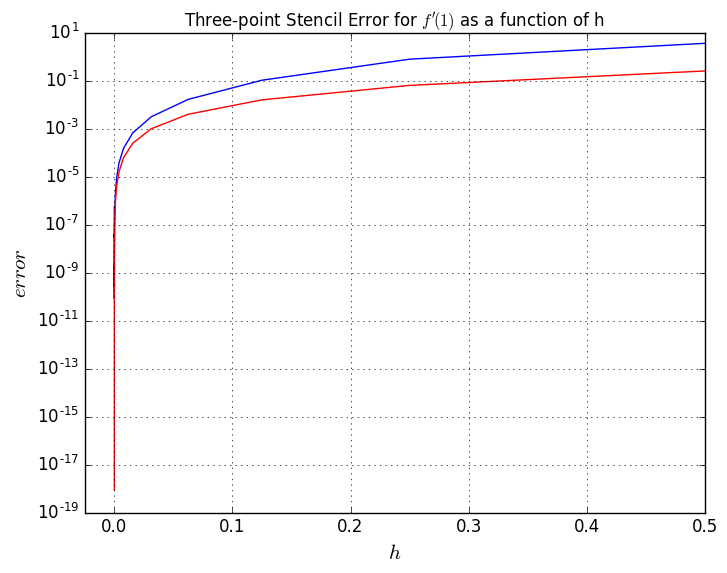

(-0.025,0.5)

In [12]:
t=linspace(1,30,30)
h=(2.0).^(-1*t)
ax = axes()
title(L"Three-point Stencil Error for $f'(1)$ as a function of h",fontsize=12);
grid("on")
#ax[:tick_params]("both",labelsize=8) 
ax[:set_xlabel](L"$h$", fontsize=15)
ax[:set_ylabel](L"$error$", fontsize=15);
semilogy(h,errors)
semilogy(h,errortheory,color="red")
xlim(-0.025,0.5)

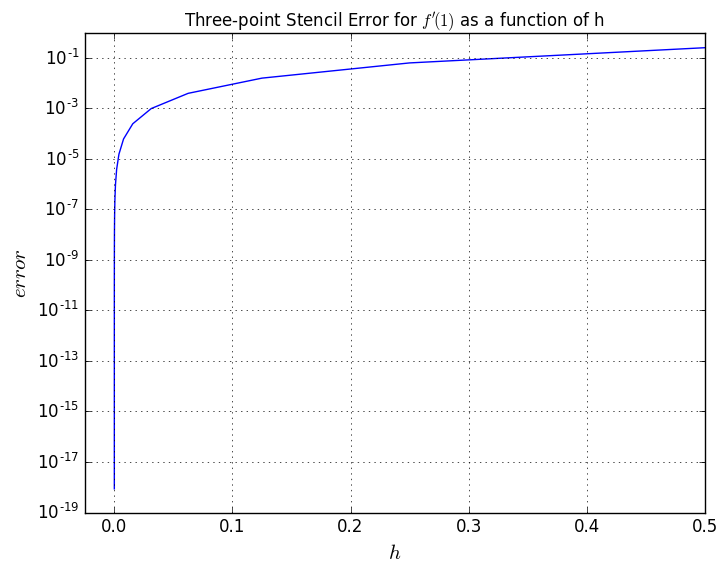

(-0.025,0.5)

In [6]:
t=linspace(1,30,30)
h=(2.0).^(-1*t)
errortheory=h.^2
ax = axes()
title(L"Three-point Stencil Error for $f'(1)$ as a function of h",fontsize=12);
grid("on")
#ax[:tick_params]("both",labelsize=8) 
ax[:set_xlabel](L"$h$", fontsize=15)
ax[:set_ylabel](L"$error$", fontsize=15);
semilogy(h,errortheory)
xlim(-0.025,0.5)

**4)** Read the examples at https://github.com/JuliaDiff/DualNumbers.jl. Define a dual number $x = 1+\epsilon$ and use it to evaluate $f^\prime(1)$. Verify that the answer is accurate to within machine precision.

In [40]:
x=Dual(2,1)
f(x)=x^3

f (generic function with 1 method)

In [41]:
y=f(x)

8 + 12ɛ

In [42]:
println("f(x) = x^3")
println("f(2) = ", realpart(y))
println("f'(2) = ", dualpart(y))

f(x) = x^3
f(2) = 8
f'(2) = 12


In [43]:
x=Dual(1,1)
f(x)=sin(exp(x))
y=f(x)

0.41078129050290885 - 2.478349732955235ɛ

In [48]:
println("f(x) = sin(exp(x))")
println("f'(1) = ", dualpart(y))

f(x) = sin(exp(x))
f'(1) = -2.478349732955235


In [50]:
eps(dualpart(y))

4.440892098500626e-16

In [51]:
eps()

2.220446049250313e-16